#Oasis Infobyte
###Task 3: Email Spam Detection

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [137]:
cd/content/gdrive/MyDrive/xyz

/content/gdrive/MyDrive/xyz


In [138]:
#reading dataset
df=pd.read_csv('/content/gdrive/MyDrive/xyz/spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [139]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [140]:
df.shape

(5572, 5)

In [141]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [142]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)

In [143]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [144]:
df.columns

Index(['target', 'text'], dtype='object')

In [145]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [146]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [147]:

df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool>

In [148]:
df=df.drop_duplicates(keep='first') # deletes the first occurrence.

In [149]:
df.shape

(5169, 2)

##EDA

In [150]:
df['target'].value_counts()


0    4516
1     653
Name: target, dtype: int64

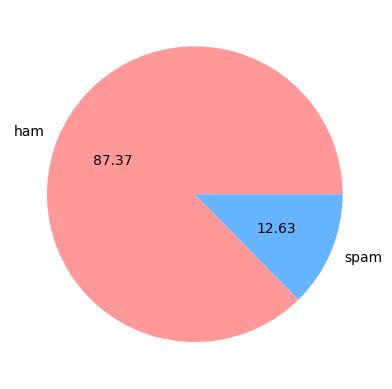

In [151]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f',colors = ['#ff9999','#66b3ff'])
plt.show()

In [152]:
# Natural Language Toolkit
import nltk

In [153]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [154]:
df['num_chars']=df['text'].apply(len)

In [155]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [156]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [157]:
df.head()

,target,text,num_chars,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


###For ham messages

In [158]:
df[['num_chars','num_words','num_sentence']].describe()

,num_chars,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [159]:
df[df['target']==0][['num_chars','num_words','num_sentence']].describe()

,num_chars,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


###For spam messages

In [160]:
df[df['target']==1][['num_chars','num_words','num_sentence']].describe()

,num_chars,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


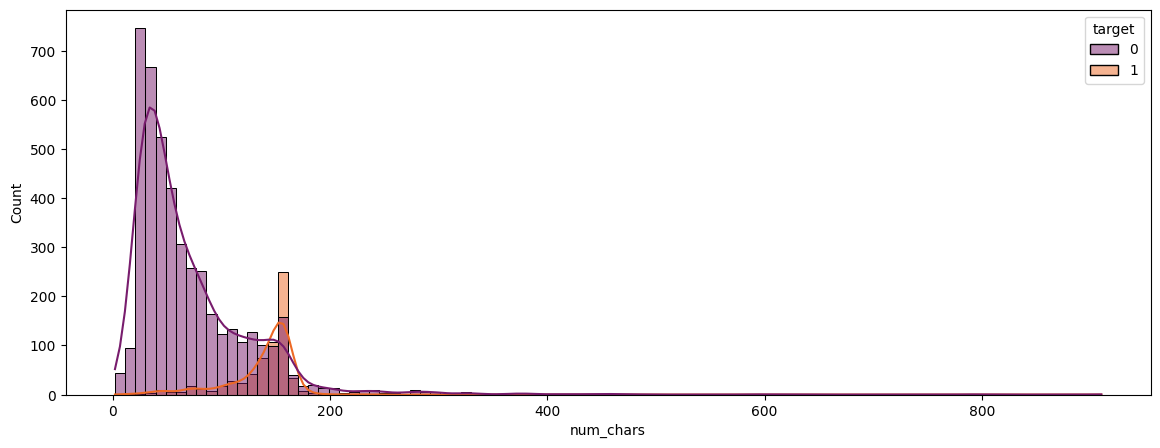

In [161]:
plt.figure(figsize=(14,5))
sns.histplot(data=df,x='num_chars',hue="target",palette="inferno",kde=True);

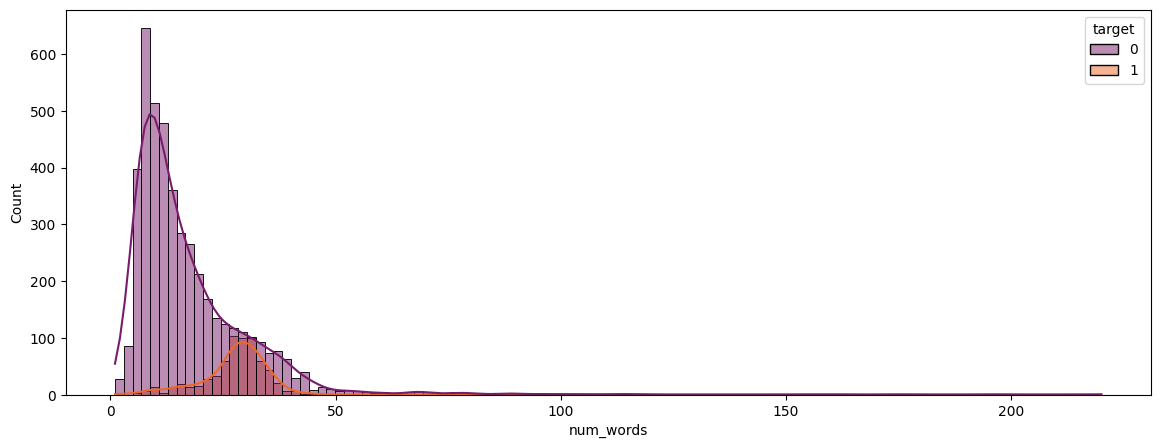

In [162]:
plt.figure(figsize=(14,5))
sns.histplot(data = df,hue='target',x='num_words',palette="inferno", kde=True);

<Figure size 1400x500 with 0 Axes>

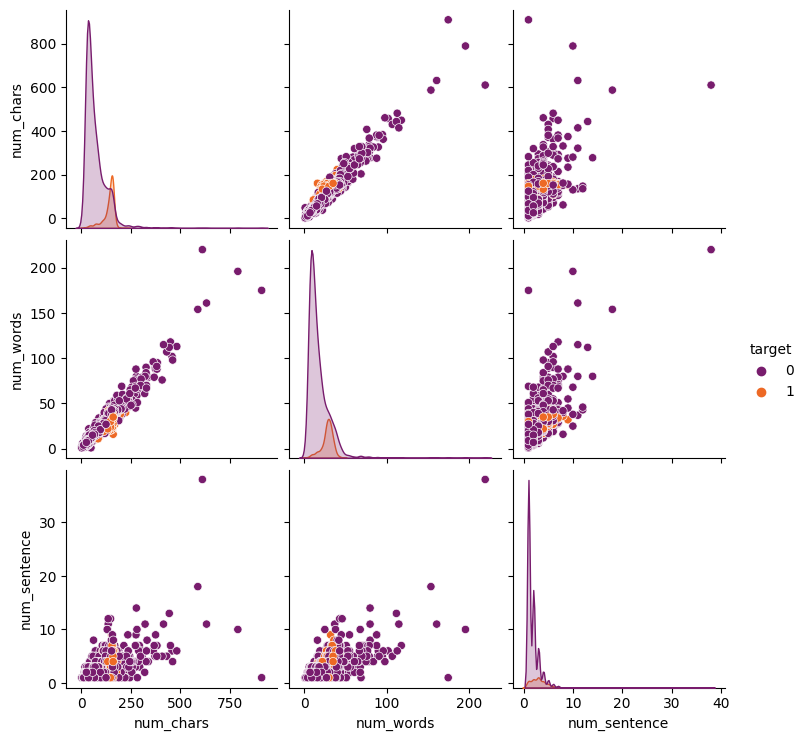

In [163]:
plt.figure(figsize=(14,5))
sns.pairplot(df,hue='target',palette='inferno');

<ipython-input-164-db93604bff16>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True);


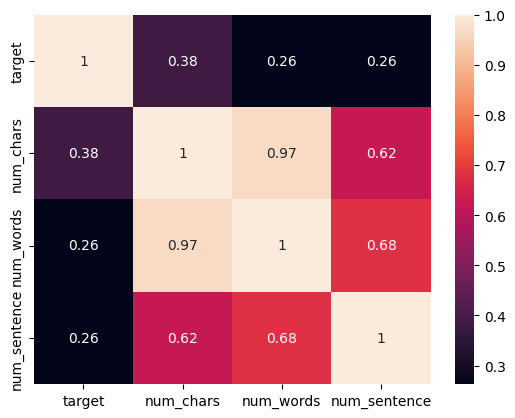

In [164]:
sns.heatmap(df.corr(),annot=True);

##NLP Data Preprocessing
#####Lower case
#####Tokenization
#####Removing special characters
#####Removing stop words and punctuation
#####Stemming

In [165]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
from nltk.corpus import stopwords
import string

In [166]:

def TextTransform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)


In [167]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [168]:
df.head()

,target,text,num_chars,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [169]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500, min_font_size = 10, background_color='black')

In [170]:
spam_wordcloud = wc.generate(df[df['target']==1]['text'].str.cat(sep=" "))

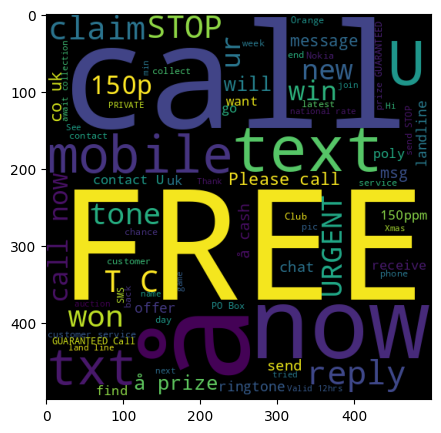

In [171]:
plt.figure(figsize=(14,5))
plt.imshow(spam_wordcloud)

In [172]:
ham_wordcloud = wc.generate(df[df['target']==0]['text'].str.cat(sep=" "))

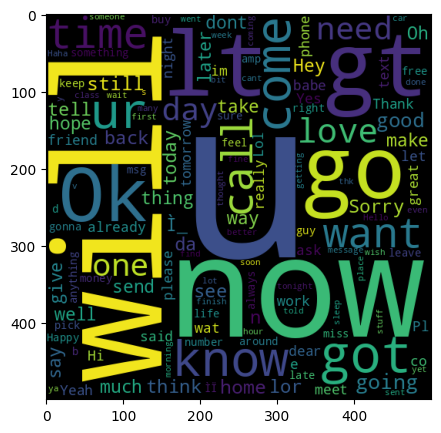

In [173]:
plt.figure(figsize=(14,5))
plt.imshow(ham_wordcloud)

###Top 30 spam messages

In [174]:
spam_corpus = []
for msg in df[df['target'] == 1]['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [175]:
len(spam_corpus)

15464

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   target        5169 non-null   int64 
 1   text          5169 non-null   object
 2   num_chars     5169 non-null   int64 
 3   num_words     5169 non-null   int64 
 4   num_sentence  5169 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 371.3+ KB


###Model Building

In [177]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [178]:
X = tfidf.fit_transform(df['text']).toarray()

In [179]:
X.shape

(5169, 3000)

In [180]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [181]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [182]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report

In [183]:
gnb_model = GaussianNB()
gnb_model.fit(X_train,y_train)
y_predict = gnb_model.predict(X_test)
print("="*100)
print("Accuracy Score:",accuracy_score(y_test,y_predict))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_predict))
print("\n",classification_report(y_test,y_predict))

Accuracy Score: 0.8965183752417795
Confusion Matrix:
 [[809  87]
 [ 20 118]]

               precision    recall  f1-score   support

           0       0.98      0.90      0.94       896
           1       0.58      0.86      0.69       138

    accuracy                           0.90      1034
   macro avg       0.78      0.88      0.81      1034
weighted avg       0.92      0.90      0.90      1034



##Classification Mode
###Logistic Regression

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# train a Logistic Regression Model
clf = LogisticRegression()

In [186]:
clf.fit(X_train, y_train)

LogisticRegression()

####2. Predictions

In [187]:
# evaluate the classifier on the test set
y_pred = clf.predict(X_test)

In [188]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

###3.Accuracy

In [189]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9642166344294004


###4.Confusion Matrix

<Axes: >

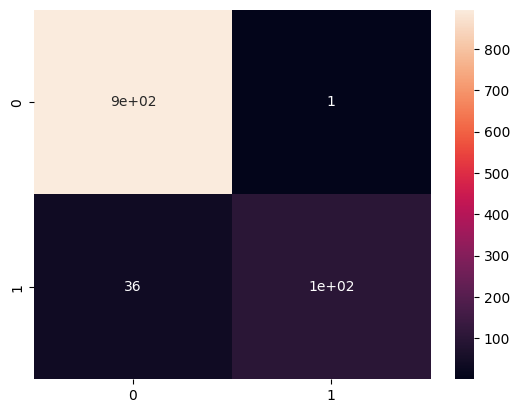

In [190]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cm, annot=True)

###5.Classification Report

In [192]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       896
           1       0.99      0.74      0.85       138

    accuracy                           0.96      1034
   macro avg       0.98      0.87      0.91      1034
weighted avg       0.97      0.96      0.96      1034



In [193]:
'''Thank You'''


'Thank You'